In [1]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [2]:
Emotions = pd.read_csv('emotion.csv')

In [3]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(46728, 2377)

In [4]:
Y=Emotions['Emotions']
X= Emotions.drop('Emotions',axis= 1)

In [5]:
Y_class=Y.replace({'neutral':0,'happy':1,'sad':2,'angry':3, 'fear':4,'disgust':5,'surprise':6})

In [6]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y_class, random_state=35,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37382, 2376), (37382,), (9346, 2376), (9346,))

In [7]:
# scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37382, 2376), (37382,), (9346, 2376), (9346,))

In [8]:
dataTrain = xgb.DMatrix(x_train,label=y_train)
dataTest = xgb.DMatrix(x_test)

In [16]:
xgb = XGBClassifier(random_state=42,
                    learning_rate=0.05,
                    n_estimators=500,
                    numleaves=35,
                    max_depth=7,
                    min_child_weight=1.0,
                    eval_metric='logloss',
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    num_class=7,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
xgb.fit(x_train,y_train)

C:\Users\11732\.conda\envs\ML\lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "numleaves", "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=1.0, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, nthread=4, num_class=7, ...)

特征重要性: [('f98', 401.0), ('f131', 396.0), ('f91', 388.0), ('f0', 387.0), ('f155', 384.0), ('f26', 373.0), ('f109', 373.0), ('f120', 372.0), ('f101', 371.0), ('f113', 368.0), ('f10', 367.0), ('f5', 365.0), ('f89', 365.0), ('f125', 365.0), ('f92', 362.0), ('f127', 362.0), ('f81', 359.0), ('f107', 359.0), ('f100', 358.0), ('f24', 356.0), ('f108', 355.0), ('f75', 354.0), ('f87', 354.0), ('f129', 352.0), ('f132', 351.0), ('f16', 349.0), ('f17', 349.0), ('f22', 349.0), ('f7', 347.0), ('f28', 347.0), ('f61', 347.0), ('f104', 347.0), ('f135', 346.0), ('f6', 345.0), ('f71', 345.0), ('f140', 345.0), ('f27', 344.0), ('f9', 343.0), ('f122', 343.0), ('f124', 340.0), ('f18', 338.0), ('f67', 336.0), ('f99', 336.0), ('f130', 336.0), ('f138', 336.0), ('f111', 335.0), ('f116', 335.0), ('f128', 333.0), ('f79', 332.0), ('f161', 332.0), ('f86', 331.0), ('f103', 331.0), ('f30', 330.0), ('f153', 330.0), ('f63', 329.0), ('f126', 329.0), ('f34', 328.0), ('f35', 328.0), ('f118', 328.0), ('f21', 326.0), ('f25', 3

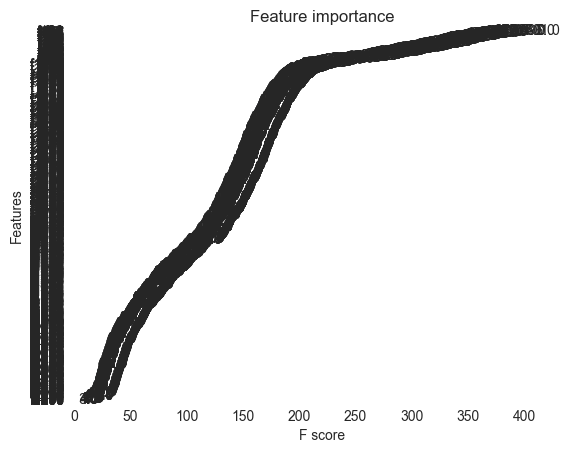

In [17]:
from xgboost import plot_importance

"""模型特征重要性提取与保存"""
# 模型特征重要性打印和保存
feature_importance = xgb.get_booster().get_fscore()
feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
feature_ipt = pd.DataFrame(feature_importance, columns=['特征名称', '重要性'])
feature_ipt.to_csv('feature_importance.csv', index=False)
print('特征重要性:', feature_importance)

# 模型特征重要性绘图
plot_importance(xgb)
plt.show()

In [18]:
xgb.save_model('xgboost_classifier_model.model')

C:\Users\11732\.conda\envs\ML\lib\site-packages\xgboost\core.py:160: UserWarning: [22:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [19]:
#训练集
y_pred_train = xgb.predict(x_train)

In [20]:
accuracy= accuracy_score(y_train, y_pred_train)
print(f"train Accuracy: {accuracy}")

train Accuracy: 0.9997859932587877


In [21]:
#测试集
y_pred=xgb.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"test Accuracy: {accuracy}")

test Accuracy: 0.7597902846137385


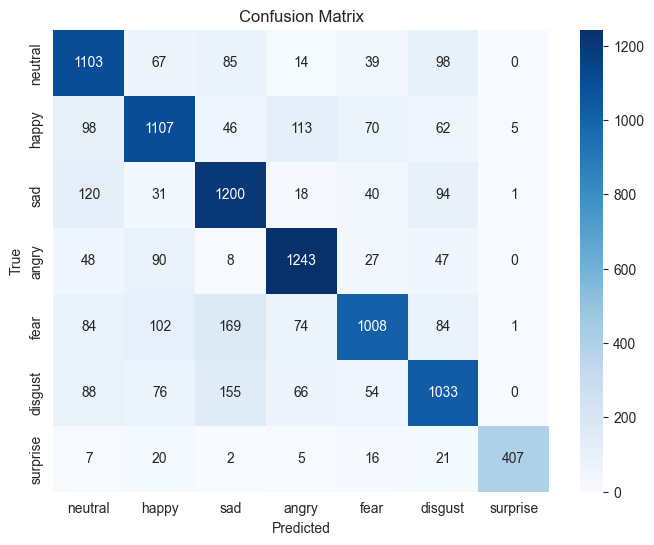

In [22]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
emotions=['neutral','happy','sad','angry', 'fear','disgust','surprise']
# 使用seaborn绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[i for i in emotions],
            yticklabels=[i for i in emotions])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()